In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

df_2006 = pd.read_csv("df_scaled_2006_CMA.csv").drop(columns=["AREA"])
df_2006.columns = ['AVG_INCOME','AVG_VALUE_DWELLINGS','POSTSECONDARY_PCT','MANAGEMENT_PCT']
df_2006

,AVG_INCOME,AVG_VALUE_DWELLINGS,POSTSECONDARY_PCT,MANAGEMENT_PCT
0,0.216160,0.002946,0.136040,0.604906
1,0.030394,-0.417172,0.316653,0.781015
2,0.606229,0.104145,0.423444,0.623351
3,0.107365,-0.580897,0.740082,0.347136
4,-0.572486,-0.597714,-0.458929,-0.554727
5,-0.565137,-0.435750,-1.004855,-0.630889
6,-0.607098,-0.448120,-0.938748,-0.690864
7,0.869546,0.264381,0.259618,0.714498
8,-0.482083,-0.491729,-0.450162,-0.396888
9,0.105663,-0.318774,0.702682,0.270504


In [15]:
df_labels=pd.read_csv("score_analysis_CMA.csv",usecols=["STATUS"])
df_labels

,STATUS
0,stb
1,stb
2,asc
3,stb
4,stb
5,stb
6,stb
7,dec
8,stb
9,dec


In [16]:
# split the data into training and test sets

x_train, x_test, y_train, y_test = train_test_split(df_2006, df_labels, test_size=0.3, stratify = df_labels, random_state=50)

# Random Forest model

In [17]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train.values.ravel())

RandomForestClassifier()

In [18]:
y_pred = rf.predict(x_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.42857142857142855


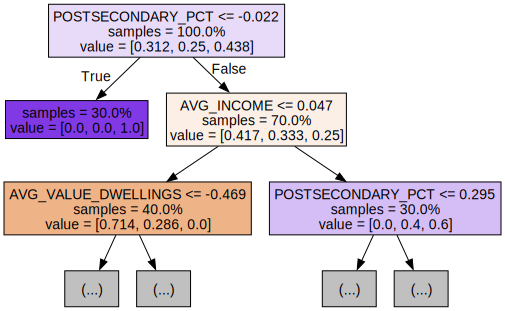

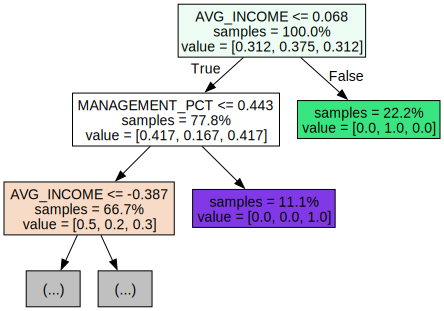

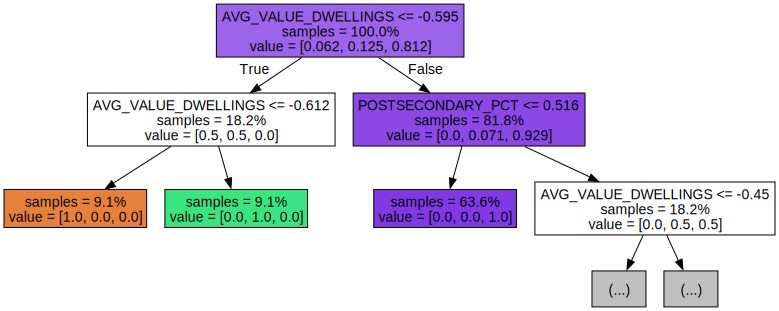

In [20]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [21]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=2)

# Fit the random search object to the data
rand_search.fit(x_train, y_train.values.ravel())

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x13fccfb50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x159e15d20>})

In [22]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 2, 'n_estimators': 396}


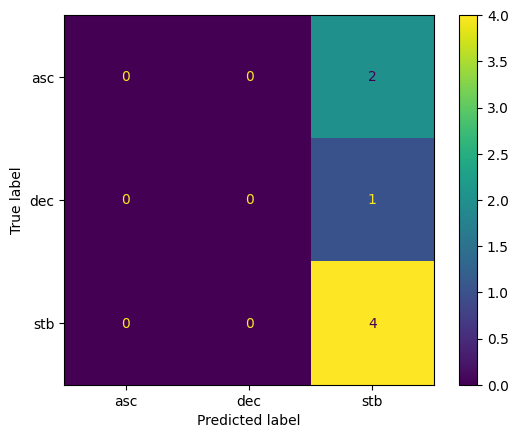

In [23]:
# Generate predictions with the best model
y_pred_rand_search = best_rf.predict(x_test)

# Create the confusion matrix
labels = best_rf.classes_
cm = confusion_matrix(y_test, y_pred_rand_search, labels=labels)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot();

In [24]:
accuracy = accuracy_score(y_test, y_pred_rand_search)
print("Accuracy:", accuracy)

Accuracy: 0.5714285714285714


In [25]:
df_2016 = pd.read_csv("df_scaled_2016_CMA.csv").drop(columns=["AREA"])
df_2016.columns = ['AVG_INCOME','AVG_VALUE_DWELLINGS','POSTSECONDARY_PCT','MANAGEMENT_PCT']
df_2016

,AVG_INCOME,AVG_VALUE_DWELLINGS,POSTSECONDARY_PCT,MANAGEMENT_PCT
0,0.729506,1.971570,0.118375,1.019818
1,0.750360,0.049457,0.775342,0.810442
2,1.288578,2.621201,0.352145,0.788479
3,0.691563,-0.172857,0.916262,0.280458
4,0.013414,-0.002946,-0.014937,-0.225133
5,-0.154503,0.449731,-0.884428,-0.348984
6,-0.148964,0.386615,-0.595932,-0.507592
7,1.257116,2.439721,0.181526,0.546661
8,-0.127169,0.241498,-0.467606,-0.283608
9,0.744603,0.525766,0.772921,0.325735


In [27]:
y_pred_2026 = best_rf.predict(df_2016)
y_pred_2026

array(['stb', 'stb', 'stb', 'dec', 'stb', 'stb', 'stb', 'stb', 'stb',
       'stb', 'stb', 'dec', 'stb', 'stb', 'stb', 'stb', 'dec', 'stb',
       'stb', 'stb', 'dec', 'dec', 'stb'], dtype=object)